In [ ]:
import yfinance as yf

In [ ]:
import pandas as pd

In [ ]:
bank_stocks = ['HDFCBANK.NS', 'SBIN.NS', 'ICICIBANK.NS', 'AXISBANK.NS', 'KOTAKBANK.NS']


In [ ]:
start_date = '2013-01-01'
end_date = '2023-12-25'


In [ ]:
# Individual Stock Import
individual_stock_data = {}
for symbol in bank_stocks:
    print(f"Downloading data for {symbol}")
    stock_df = yf.download(symbol, start=start_date, end=end_date)

    # Perform any immediate preprocessing if necessary
    #  handling missing data
    stock_df.fillna(method='ffill', inplace=True)
    # Save the DataFrame to a CSV file
    stock_df.to_csv(f'{symbol}.csv')

    # Store in dictionary
    individual_stock_data[symbol] = stock_df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Combined Data Import for closing prices
print("Downloading combined data for all stocks")
combined_data = yf.download(bank_stocks, start=start_date, end=end_date)['Close']
 # Save the DataFrame to a CSV file
combined_data.to_csv(f'combined_data.csv')

[*********************100%%**********************]  5 of 5 completed


In [ ]:
for symbol, df in individual_stock_data.items():
    print(f"First 10 rows of data for {symbol}:")
    print(df.head(10))
    print("\n")


In [ ]:
print("First 10 rows of combined data:")
print(combined_data.head(10))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Descriptive Statistics
for symbol, df in individual_stock_data.items():
    print(f"Statistics for {symbol}:")
    print(df.describe())


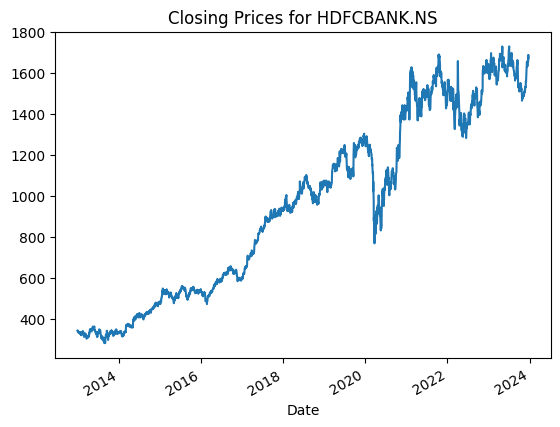

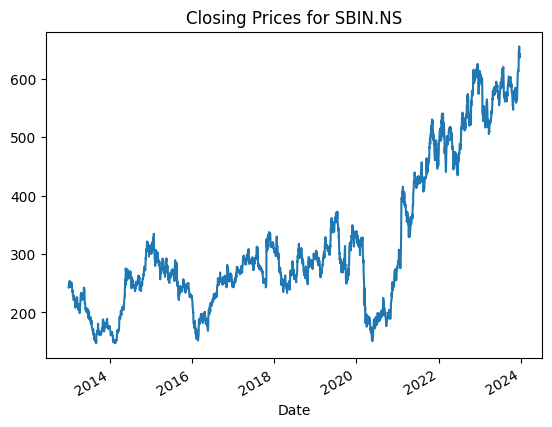

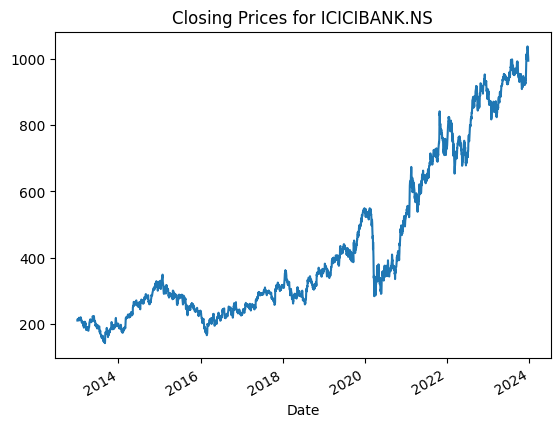

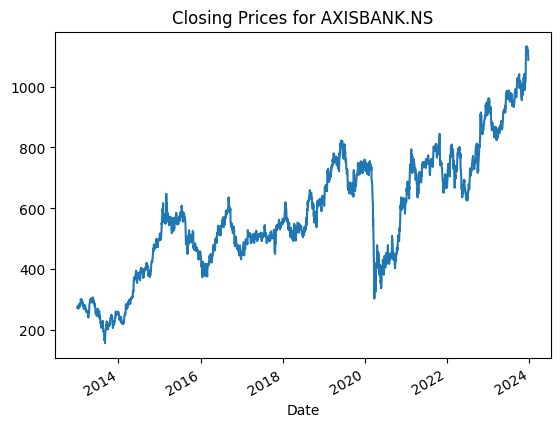

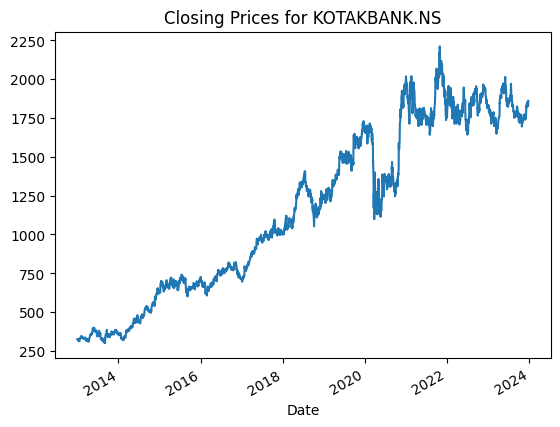

In [ ]:
# Plotting Closing Prices for Individual Stocks
for symbol, df in individual_stock_data.items():
    df['Close'].plot(title=f'Closing Prices for {symbol}')
    plt.show()

**Individual Bank Closing Prices:**

Each bank's stock has unique trends and patterns.

**Strategy:**

 Analyze each bank's trend and performance to build individualized predictive features, such as trend indicators and momentum scores.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

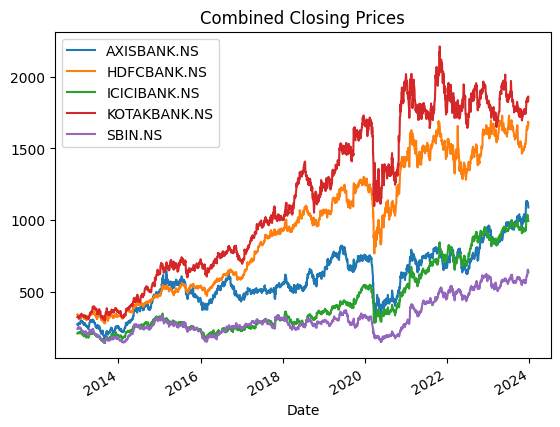

In [ ]:
# Plotting Combined Closing Prices
combined_data.plot(title='Combined Closing Prices')
plt.show()

**Combined Closing Prices:**

The plot shows that the stocks have different growth rates and volatility. Some stocks show more aggressive growth than others.

**Strategy:**

Develop separate models or sub-models for each stock, taking into account their unique growth patterns and volatility.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

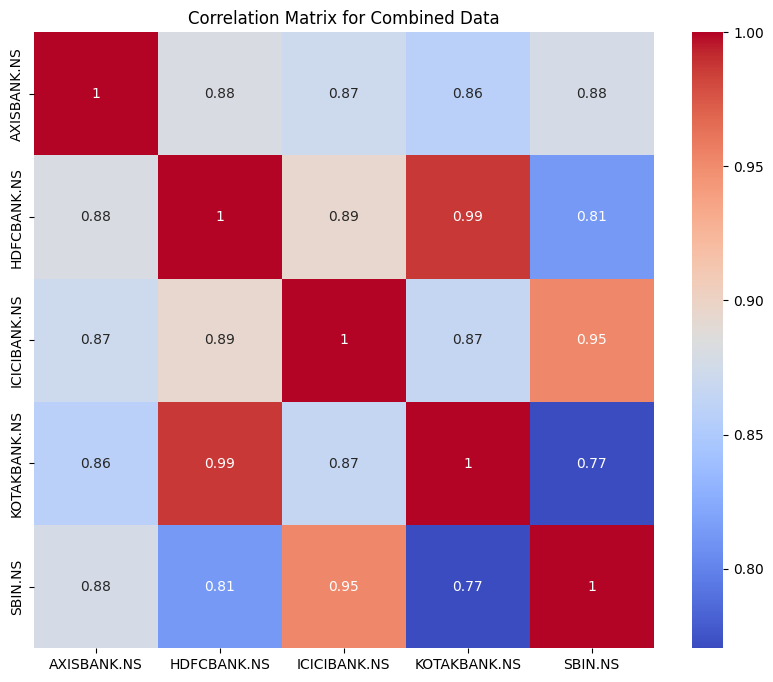

In [ ]:
# Correlation Analysis for Combined Data
plt.figure(figsize=(10, 8))
sns.heatmap(combined_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Combined Data')
plt.show()

**Correlation Matrix for Combined Data:**

High correlation values between the banks indicate that they often move in tandem, likely reacting similarly to market-wide news.

**Strategy:**

Consider portfolio diversification strategies and explore pairs trading opportunities. Use correlation as a feature to identify market sentiment shifts.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
pip install pandas numpy matplotlib seaborn ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=e1b7a45356cc4b363962e4fc16e0addc5efeddc7f09b8f0dba3731668c6ce575
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:

import numpy as np
from ta import add_all_ta_features
from statsmodels.tsa.stattools import acf

In [ ]:
# Assuming 'df' is one of our individual stock data DataFrames
# Calculating daily returns
df['Daily Returns'] = df['Close'].pct_change()


In [ ]:
# Volatility (rolling 30-day standard deviation of returns)
df['Volatility'] = df['Daily Returns'].rolling(window=30).std()

In [ ]:
# Adding technical indicators using 'ta' library
df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume")

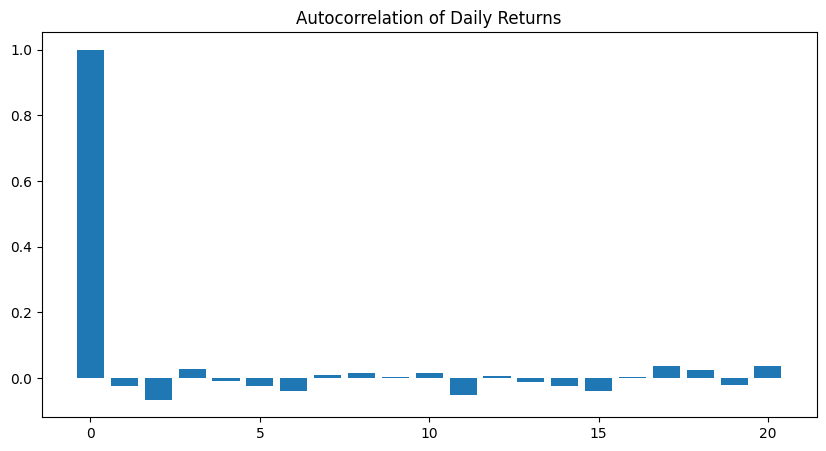

In [ ]:
# Autocorrelation analysis
autocorrelation = acf(df['Daily Returns'].dropna(), nlags=20)
plt.figure(figsize=(10, 5))
plt.bar(range(len(autocorrelation)), autocorrelation)
plt.title('Autocorrelation of Daily Returns')
plt.show()

**Autocorrelation of Daily Returns:**

Significant initial autocorrelation suggests that past returns could influence future returns, but this influence diminishes rapidly over time.

**Strategy:**

 Use short-term lagged returns as features to leverage the predictive power of the initial autocorrelation.

---------------------------------------------------------------------------

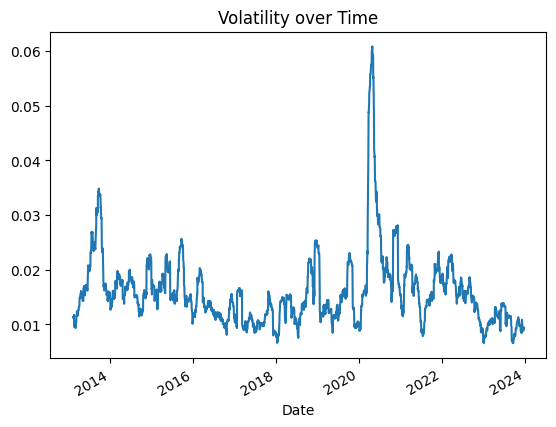

In [ ]:
# Visualizing the Volatility
df['Volatility'].plot(title='Volatility over Time')
plt.show()

**Volatility Over Time:**

The volatility plot shows fluctuating risk levels over time, with notable spikes suggesting periods of market instability or specific bank-related events.

**Strategy:**

Incorporate volatility as a feature to capture market risk. Higher volatility might indicate riskier investments.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


**Based On Above Analysis **


**Technical Indicators to Add:**


**Moving Averages:**

Use simple moving average (SMA) and exponential moving average (EMA) to smooth out short-term fluctuations and highlight longer-term trends.

**Relative Strength Index (RSI):**

Measure the magnitude of recent price changes to evaluate overbought or oversold conditions.

**MACD (Moving Average Convergence Divergence):**

Explore the relationship between two moving averages of a stock's price to identify trend direction and reversals.

**Bollinger Bands:**

Add Bollinger Bands to identify the volatility and relative price levels over time.

**Volume-Weighted Average Price (VWAP):**

Use VWAP to understand the average price a stock traded at over a trading horizon.

**Fibonacci Retracements:**

For trend analysis and to identify potential reversal levels.


**Model Building Strategies:**


**Ensemble Methods:**

Combine predictions from multiple models to reduce variance and improve robustness.

**Time Series Analysis:**

Utilize  LSTM models to capture the temporal dynamics of stock prices.

**Cross-Validation:**

Implement time-series cross-validation to evaluate model performance while maintaining the temporal order of observations.

**Feature Importance:**

Analyze feature importance to identify which indicators are most predictive of stock price movements.

**Regularization Techniques:**

Apply regularization to prevent overfitting, especially when using models like linear regression with many features.

**Next Steps:**

**Feature Construction:**

Based on the analysis, construct a feature set including the identified technical indicators.

**Model Training:**

Train models on historical data using the constructed features.

**Model Evaluation:**

Evaluate models using appropriate time-series validation techniques.

**Backtesting:**

Backtest the model using historical data to simulate trading performance.